In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

In [24]:
from utils.loader import load_data
# Load Cumulants object
kernel = 'exp_d100'
mode = 'nonsym_1'
log10T = 10
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_params_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Alpha, Beta, Gamma = load_data(url)

In [25]:
import gzip, pickle
f = gzip.open('out_sto.pkl.gz','rb')
R = pickle.load(f,encoding='latin1')
f.close()

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


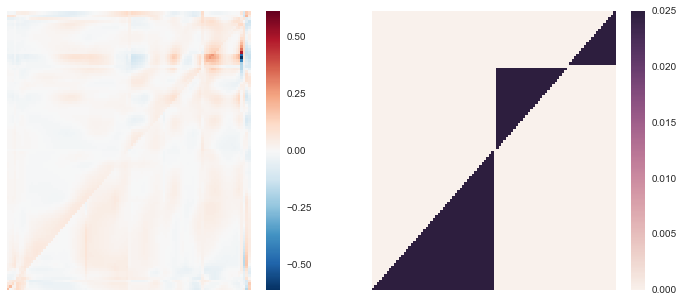

In [28]:
fig, axs = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

from scipy.linalg import inv
G = np.eye(R.shape[0]) - inv(R)
#G[G<0.]=0.
#G = np.log(1e-10+G)
sns.heatmap(G[::-1], ax=axs[0], xticklabels=False, yticklabels = False)
G_true = np.eye(cumul.dim) - inv(cumul.R_true)
#G_true = np.log(1e-10+G_true)
sns.heatmap(G_true[::-1], ax=axs[1], xticklabels=False, yticklabels = False)